In [1]:
import tensorflow as tf
from tensorflow import keras

if tf.test.gpu_device_name()=='':
    print('You do not have GPU access.')
    !nvidia-smi

else:
  print('You have GPU access')
  !nvidia-smi


# print the tensorflow version
print('TensorFlow {}; Keras {}'.format(tf.__version__, keras.__version__))
tf.test.gpu_device_name()

You have GPU access
Sat Mar 12 06:22:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.41       Driver Version: 471.41       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P0    17W /  N/A |    300MiB /  4096MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

'/device:GPU:0'

In [2]:
from tensorflow.keras import layers
from keras.models import load_model

#load pretrained model

model = load_model("models/bactunet_noEmpty_final_alldata.hdf5", compile=False)
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 288, 288) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 288, 288) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 288, 288) 1152        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64, 288, 288) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [26]:
# summarize filters in each convolutional layer
from matplotlib import pyplot as plt

conv_layers = []
biases = []
# summarize filter shapes
l = -1
for layer in model.layers:
    l+=1
    print(layer.name, layer.input_shape ,layer.output_shape, l)
    # check for convolutional layer
    if 'conv' in layer.name:
        #filters, biases = layer.get_weights()
        conv_layers.append(layer)
        #biases.append(biases)

    
    

input_1 [(None, 3, 288, 288)] [(None, 3, 288, 288)] 0
conv2d (None, 3, 288, 288) (None, 64, 288, 288) 1
batch_normalization (None, 64, 288, 288) (None, 64, 288, 288) 2
dropout (None, 64, 288, 288) (None, 64, 288, 288) 3
conv2d_1 (None, 64, 288, 288) (None, 64, 288, 288) 4
batch_normalization_1 (None, 64, 288, 288) (None, 64, 288, 288) 5
dropout_1 (None, 64, 288, 288) (None, 64, 288, 288) 6
max_pooling2d (None, 64, 288, 288) (None, 64, 144, 144) 7
conv2d_2 (None, 64, 144, 144) (None, 128, 144, 144) 8
batch_normalization_2 (None, 128, 144, 144) (None, 128, 144, 144) 9
dropout_2 (None, 128, 144, 144) (None, 128, 144, 144) 10
conv2d_3 (None, 128, 144, 144) (None, 128, 144, 144) 11
batch_normalization_3 (None, 128, 144, 144) (None, 128, 144, 144) 12
dropout_3 (None, 128, 144, 144) (None, 128, 144, 144) 13
max_pooling2d_1 (None, 128, 144, 144) (None, 128, 72, 72) 14
conv2d_4 (None, 128, 72, 72) (None, 256, 72, 72) 15
batch_normalization_4 (None, 256, 72, 72) (None, 256, 72, 72) 16
dropout_4 

In [63]:
for l in conv_layers:
    # retrieve weights from the first hidden layer
    filters, biases = l.get_weights()
    print(l.name, filters.shape, biases.shape)

conv2d (3, 3, 3, 64) (64,)
conv2d_1 (3, 3, 64, 64) (64,)
conv2d_2 (3, 3, 64, 128) (128,)
conv2d_3 (3, 3, 128, 128) (128,)
conv2d_4 (3, 3, 128, 256) (256,)
conv2d_5 (3, 3, 256, 256) (256,)
conv2d_6 (3, 3, 256, 512) (512,)
conv2d_7 (3, 3, 512, 512) (512,)
conv2d_8 (3, 3, 512, 1024) (1024,)
conv2d_9 (3, 3, 1024, 1024) (1024,)
conv2d_transpose (2, 2, 512, 1024) (512,)
conv2d_10 (3, 3, 1024, 512) (512,)
conv2d_11 (3, 3, 512, 512) (512,)
conv2d_transpose_1 (2, 2, 256, 512) (256,)
conv2d_12 (3, 3, 512, 256) (256,)
conv2d_13 (3, 3, 256, 256) (256,)
conv2d_transpose_2 (2, 2, 128, 256) (128,)
conv2d_14 (3, 3, 256, 128) (128,)
conv2d_15 (3, 3, 128, 128) (128,)
conv2d_transpose_3 (2, 2, 64, 128) (64,)
conv2d_16 (3, 3, 128, 64) (64,)
conv2d_17 (3, 3, 64, 64) (64,)
conv2d_18 (1, 1, 64, 1) (1,)


(3, 3, 64, 64)


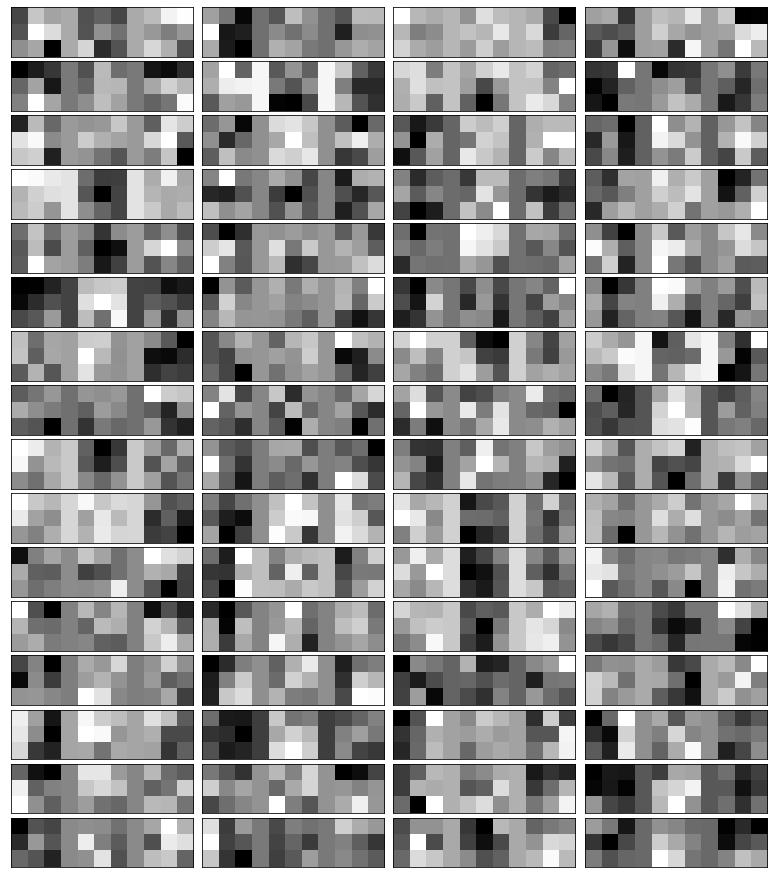

In [71]:
import numpy as np 

# retrieve weights from the first hidden layer
filters, biases = conv_layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot first few filters
n_filters = 64

plt.figure(figsize=(60,60))
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
   
    #create empty array for tight plotting
    if f.shape[0] == 3:
        plotme = np.full((3, 11),0.5, dtype=np.float32)
    # plot each channel separately
    x = 0
    for j in range(f.shape[0]):
        # specify subplot and turn of axis
        kernel = f[:, :, j]
        plotme[0:3, x:x+3] = kernel
        x+=4
        ax = plt.subplot(n_filters, 4, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        #plt.tight_layout()
        plt.imshow(plotme, cmap='gray')

# show the figure
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.3, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.05)
plt.show()

conv2d_transpose (None, 1024, 18, 18) (None, 512, 36, 36) (2, 2, 512, 1024)
conv2d_transpose_1 (None, 512, 36, 36) (None, 256, 72, 72) (2, 2, 256, 512)
conv2d_transpose_2 (None, 256, 72, 72) (None, 128, 144, 144) (2, 2, 128, 256)
conv2d_transpose_3 (None, 128, 144, 144) (None, 64, 288, 288) (2, 2, 64, 128)
(2, 2, 256, 512)


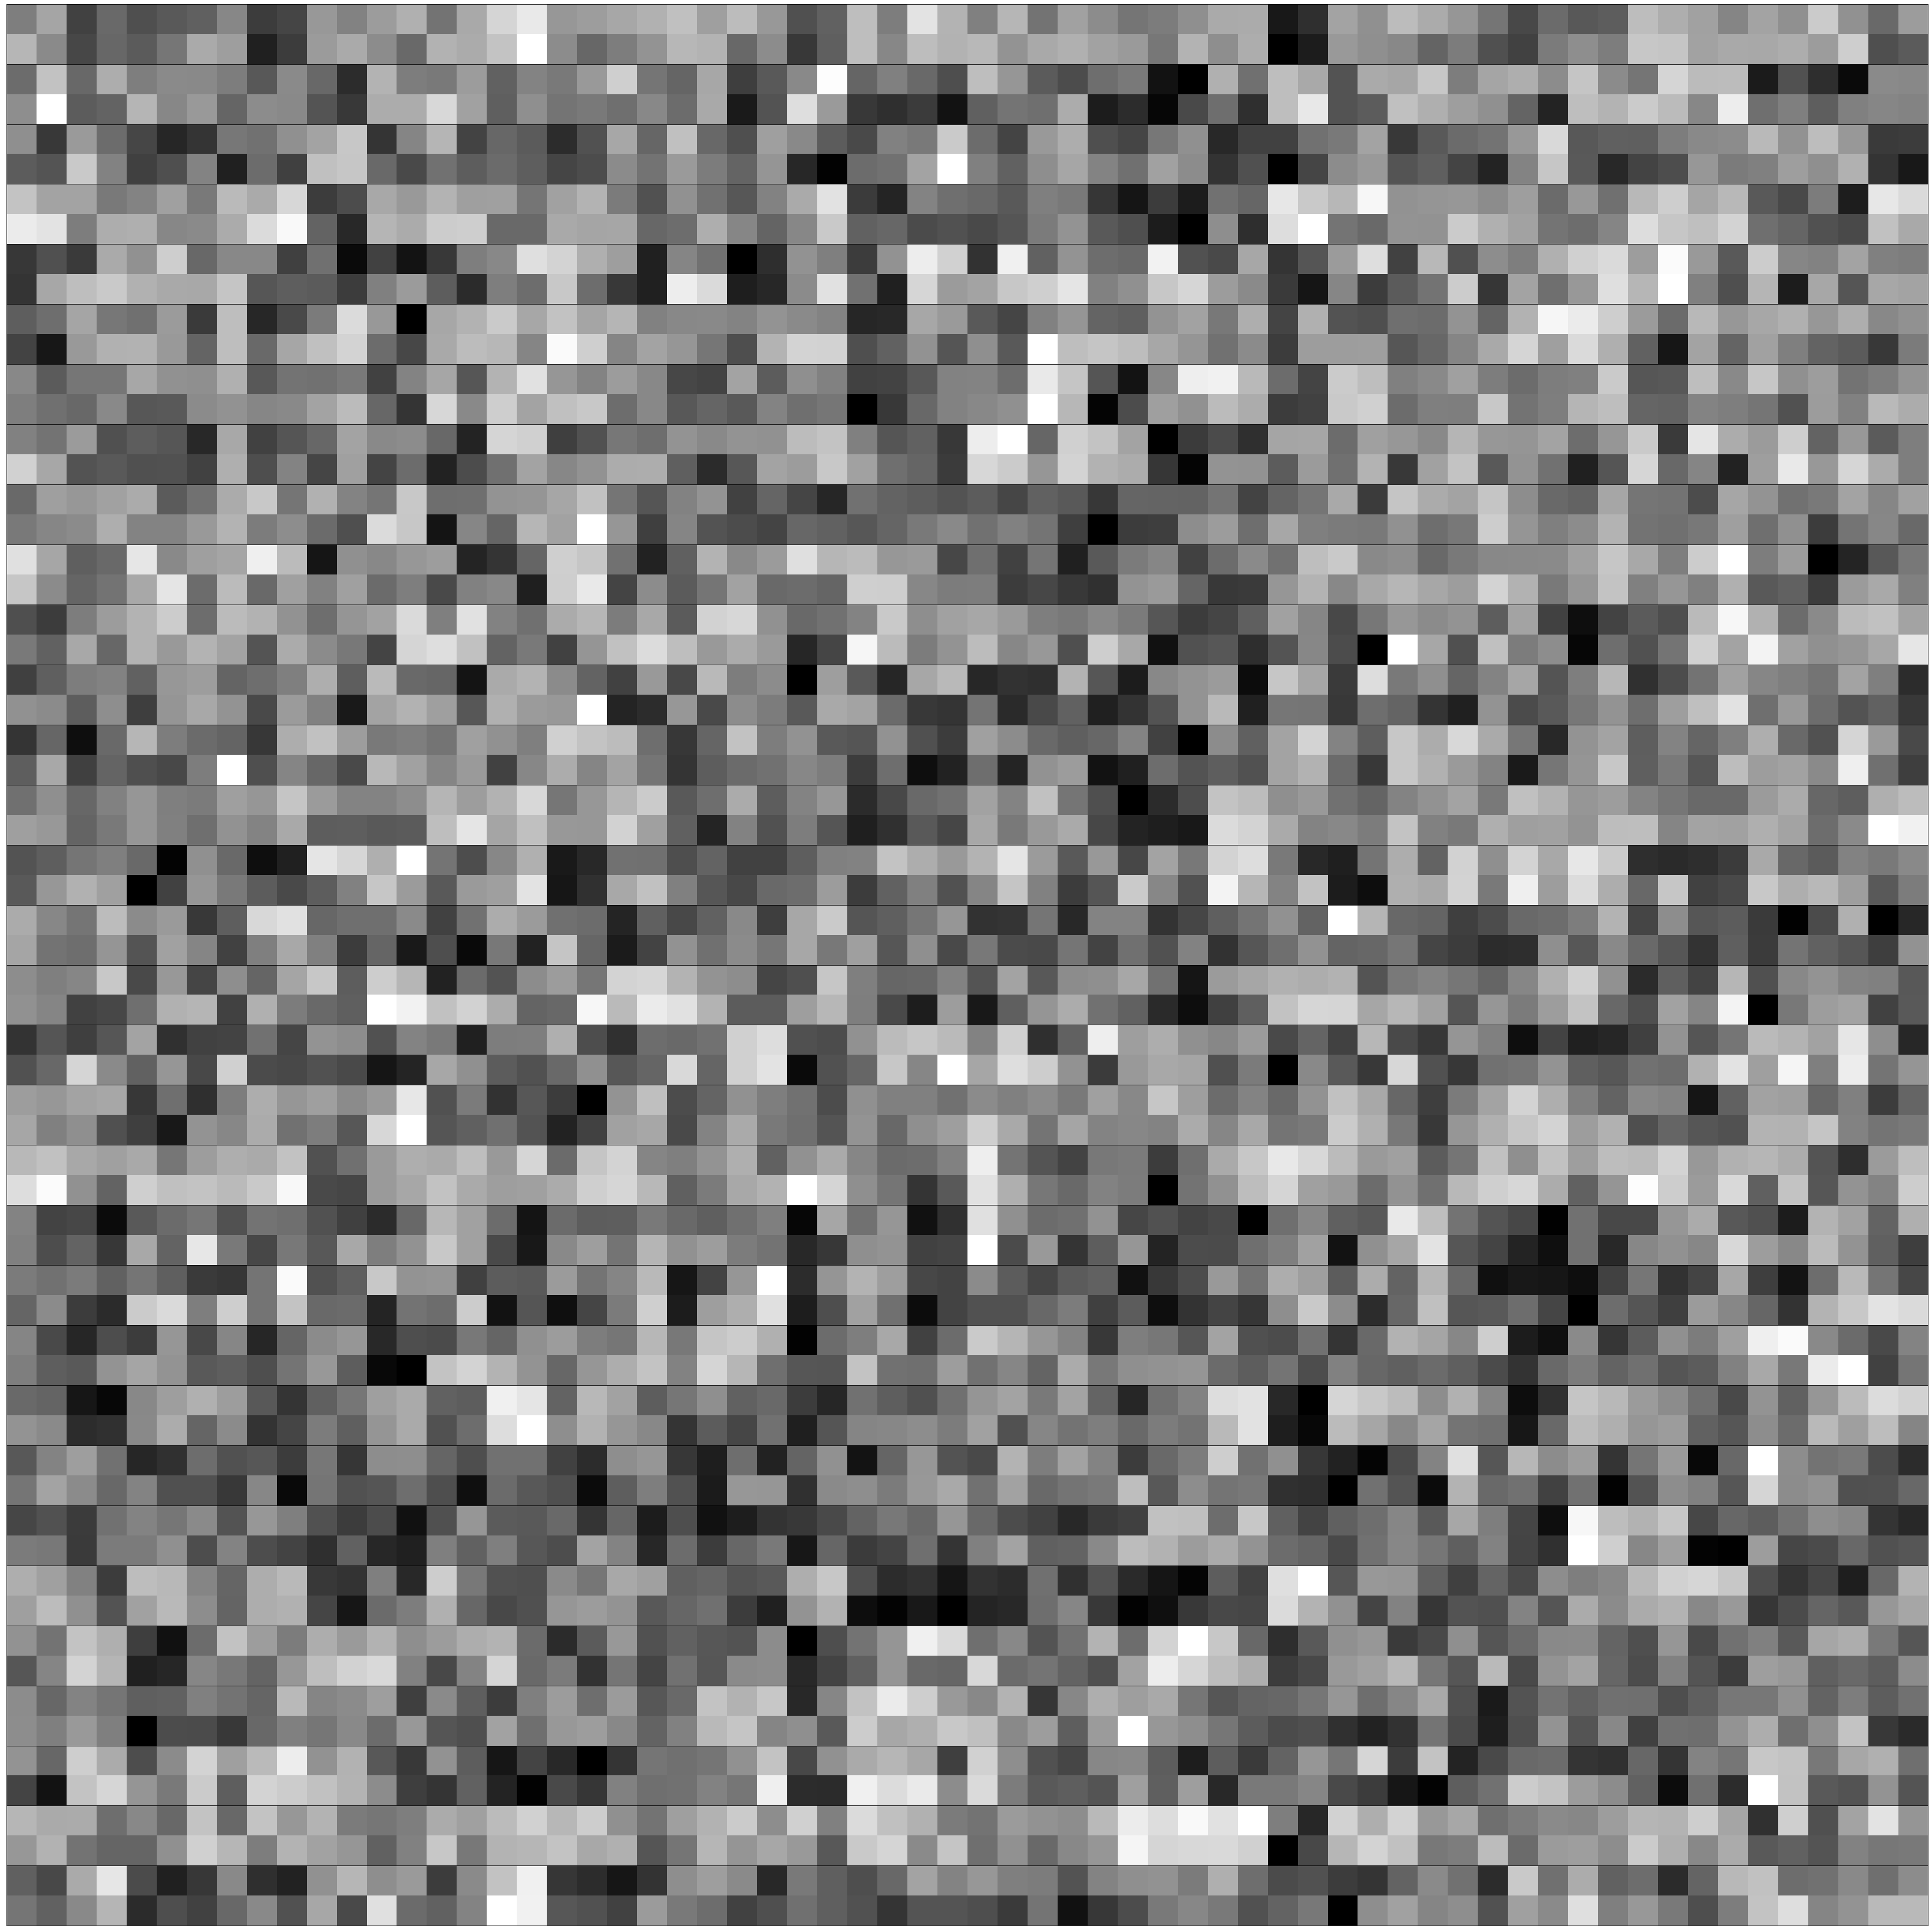

In [92]:
#Lets look at the convTranspose layers

transp_layers = []
for layer in model.layers:
    if 'transp' in layer.name:
        filters, biases = layer.get_weights()
        print(layer.name, layer.input_shape ,layer.output_shape, filters.shape)
        transp_layers.append(layer)

filters, biases = transp_layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot first few filters
n_filters = 32
kerns = 32
plt.figure(figsize=(60,60))
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
   
    #create empty array for tight plotting
    plotme = np.full((2, kerns*2),0.5, dtype=np.float32)
    # plot each channel separately
    x = 0
    for j in range(kerns):
        x = 2*j
        kernel = f[:, :, j]
        plotme[0:2, x:x+2] = kernel
        ax = plt.subplot(n_filters, 1, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        #plt.tight_layout()
        plt.imshow(plotme, cmap='gray')

# show the figure
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig(r"Bactnet\visualization\gifs\bactnet_transpose4.png")
plt.show()


(3, 288, 288)
(1, 3, 288, 288)


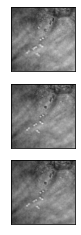

In [47]:
import tifffile as tif

#load test image
loadme = r"Bactnet\visualization\BT403_228_crop.tif"
img = tif.imread(loadme).astype(np.float32)

# normalize image values to 0-1
f_min, f_max = img.min(), img.max()
img = (img - f_min) / (f_max - f_min)

print(img[0:3].shape)
img = np.expand_dims(img[0:3], axis=0)
print(img.shape)

#fig, ax = plt.subplots(figsize=(18, 6), tight_layout=True)
ax =plt.subplot(3, 1, 1)
plt.imshow(img[0,0,:,:], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax =plt.subplot(3, 1, 2)
plt.imshow(img[0,1,:,:], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax =plt.subplot(3, 1, 3)
plt.imshow(img[0,2,:,:], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])


plt.show()

In [53]:
from keras import Model
# redefine model to output right after the first hidden layer
model2 = Model(inputs=model.inputs, outputs=model.layers[33].output)


# get feature map for first hidden layer
feature_maps = model2.predict(img)

print(feature_maps.shape)

(1, 1024, 18, 18)


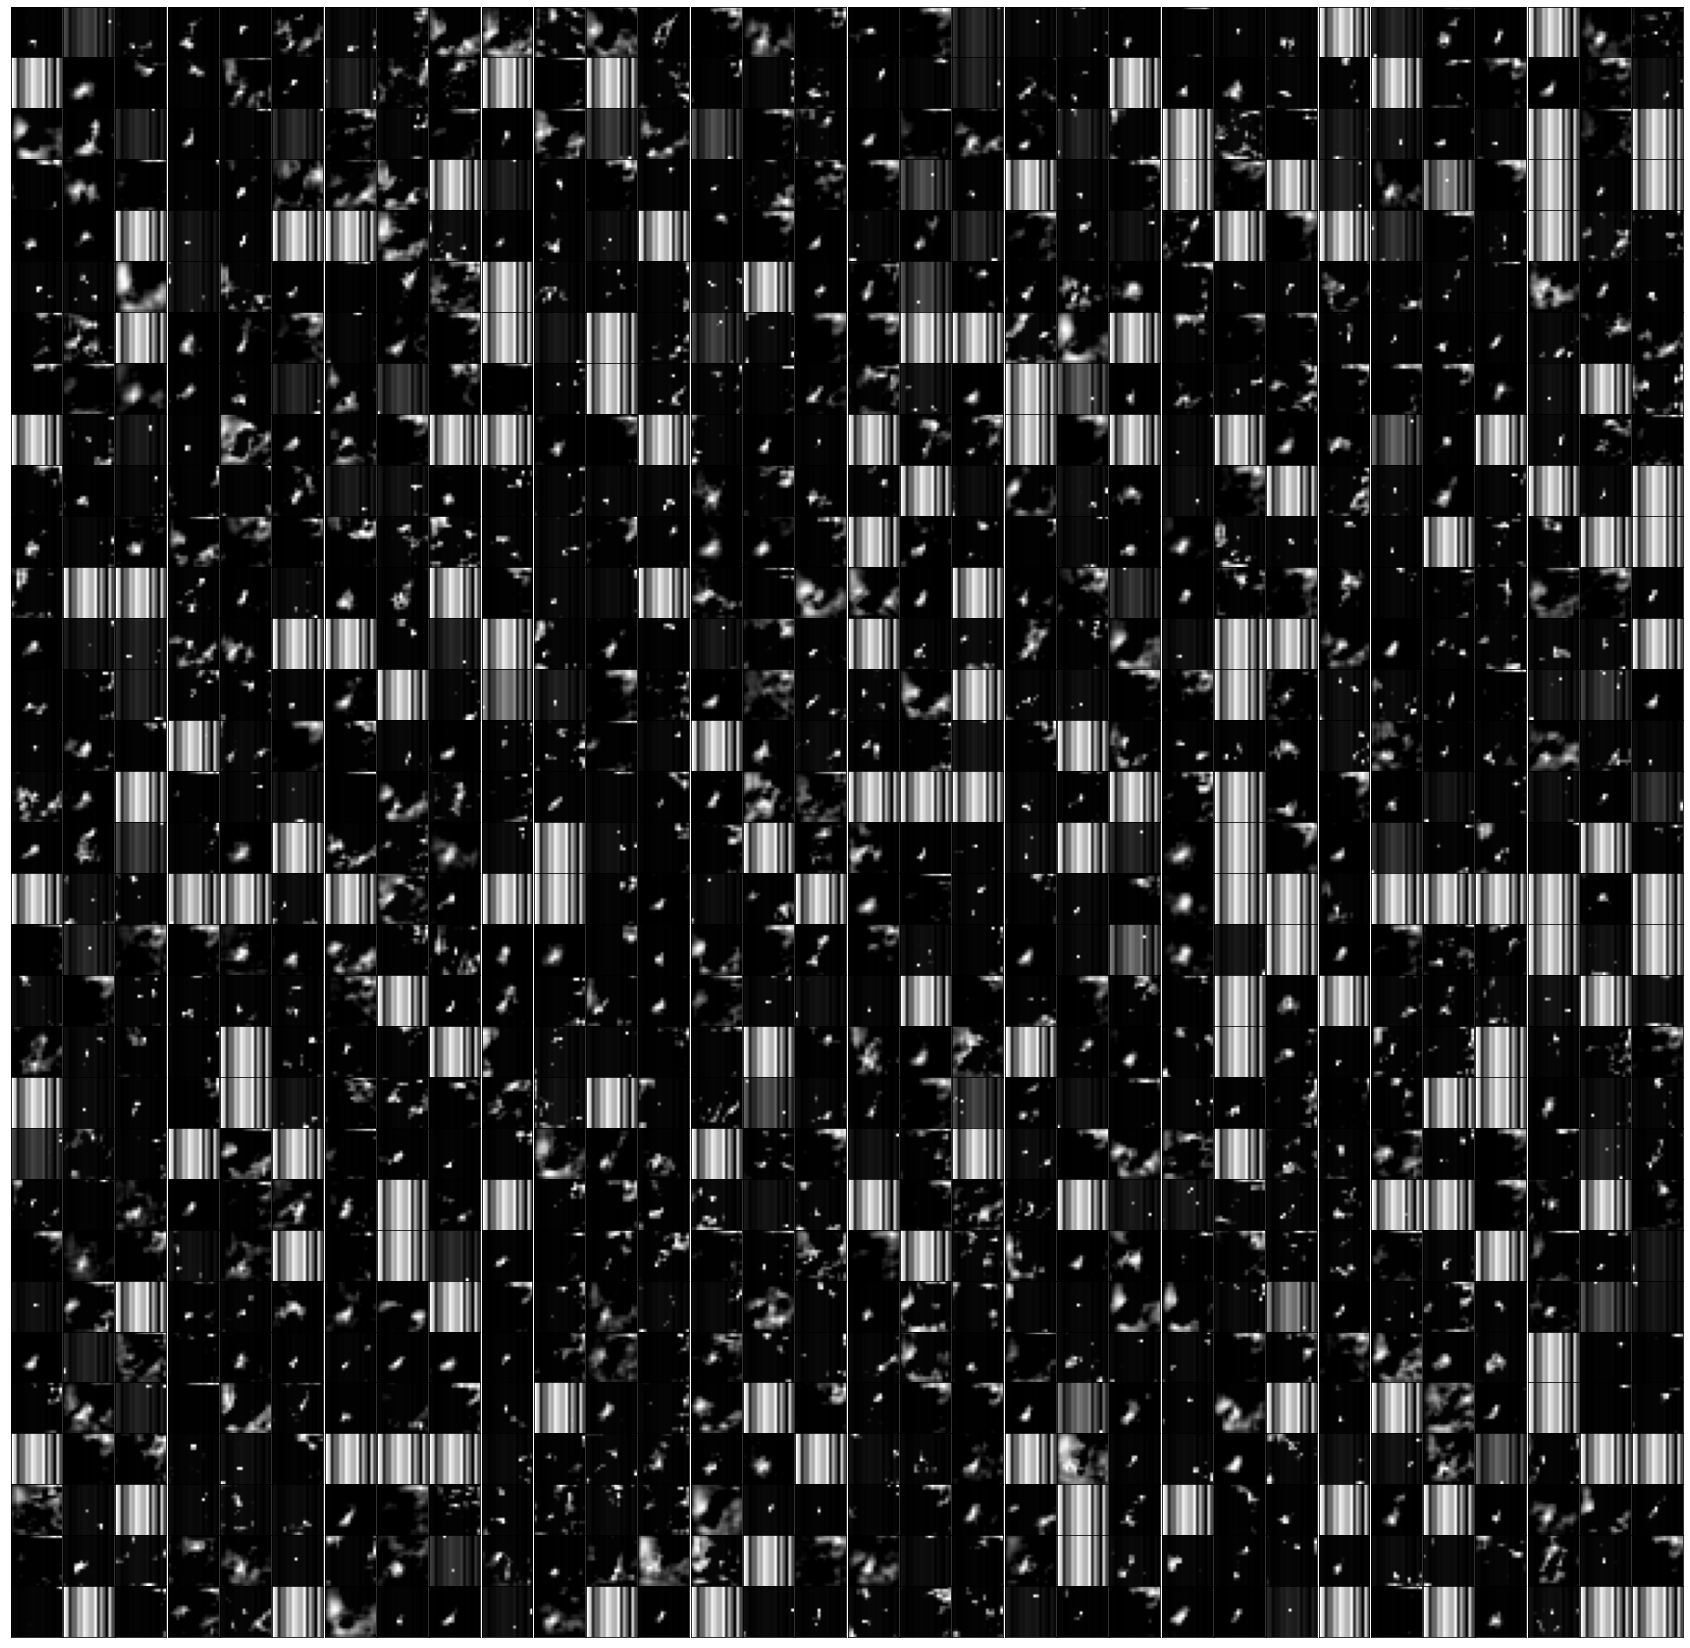

In [55]:
#Block 1 visualization
square = 32
ix = 1
plt.figure(figsize=(30,30))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, ix-1, :, :], cmap='gray')
        ix += 1
# show the figure

plt.subplots_adjust(
                    wspace=0.0, 
                    hspace=0.0)
plt.savefig(r"Bactnet\visualization\gifs\BT403_228_crop.png")
plt.show()


In [44]:
def make_fig(fmap, outdir, fname):
    nmaps = fmap.shape[1]
    plt.figure(figsize=(30,30))
    for i in range(min(nmaps, ncol**2)):
        # specify subplot and turn of axis
        ax = plt.subplot(ncol, ncol, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fmap[0, i, :, :], cmap='gray')
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    saveme = os.path.join(outdir, fname)
    plt.savefig(saveme)
    plt.close()


KeyboardInterrupt: 

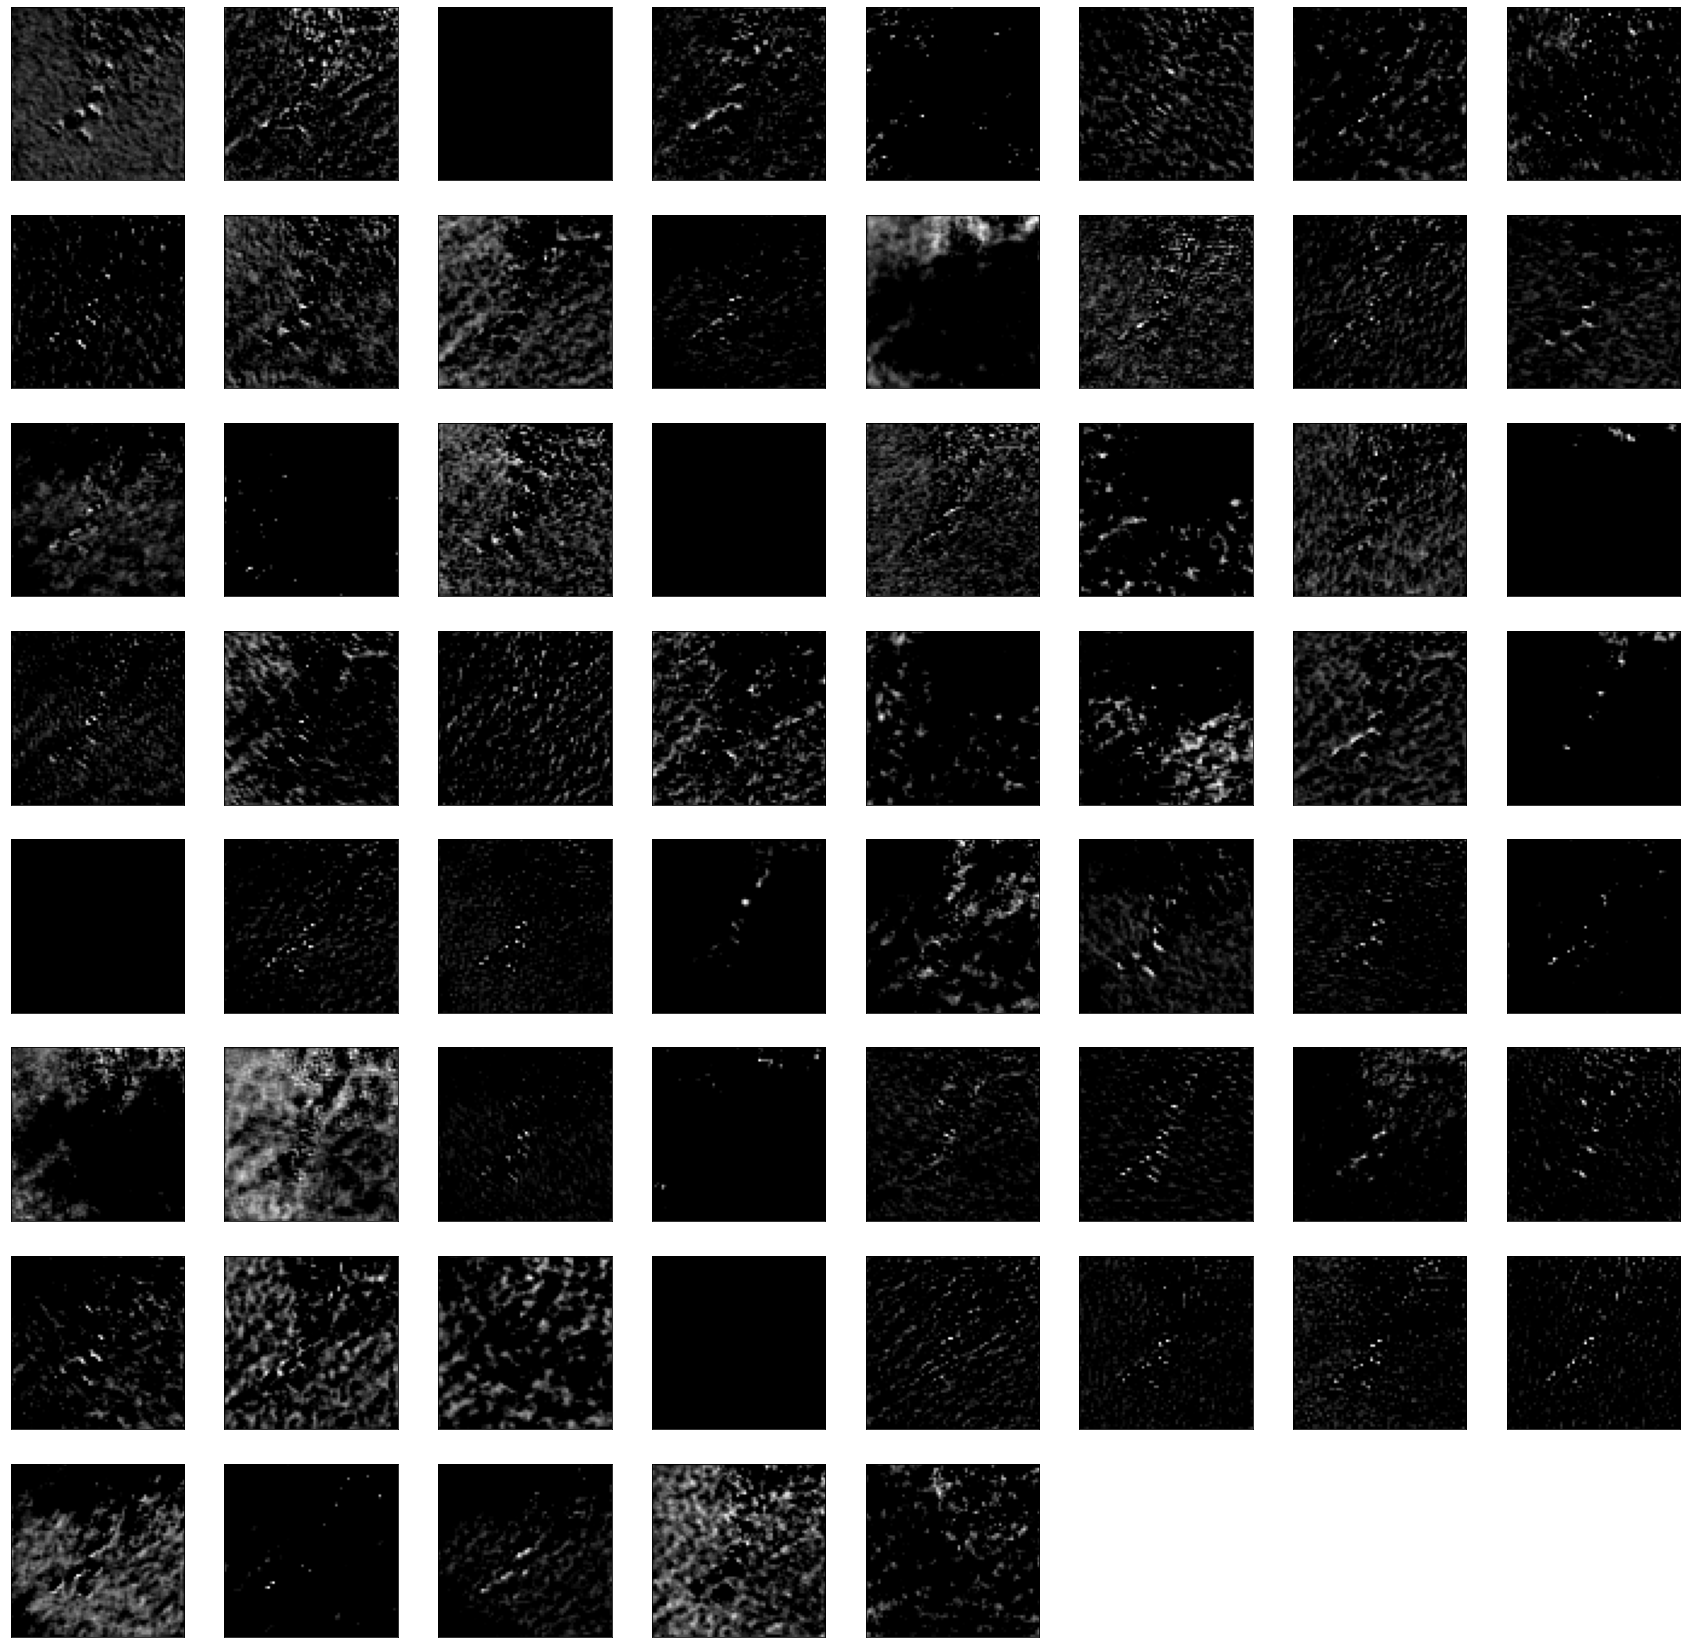

In [45]:
import os

n_layers = len(model.layers)
outdir = r"Bactnet\visualization\gifs"
ncol = 8

    
l=0
for layer in conv_layers:
    l+=1
    model2 = Model(inputs=model.inputs, outputs=layer.output)
    feature_maps = model2.predict(img)
    make_fig(feature_maps, outdir, str(l)+"_"+layer.name+".png")


In [46]:
from preprocessing import normalizePercentile
#now lets do a full (cropped) movie visualize outpit from penultimate layer
model2 = Model(inputs=model.inputs, outputs=model.layers[1].output)

infile = "BT403_allT_crop.tif"
indir = r"Bactnet\visualization"
outdir = r"Bactnet\visualization\gifs"

img2 = tif.imread(os.path.join(indir,infile)).astype(np.float32)
img2 = normalizePercentile(img2, 0.1, 99.9, clip=True)
print(img2.shape)
y_pred = None
for i in range(len(img2)-2):
    tmp = img2[i:i+3]
    tmp = np.expand_dims(tmp, axis=0)
    feature_maps = model2.predict(tmp)
    pred = model.predict(tmp)
    if y_pred is None:
        y_pred = pred
    else: 
        y_pred = np.concatenate((y_pred, pred))
        
    fname = str(i)+"_"+layer.name+".png"
    print(fname, y_pred.shape)
    make_fig(feature_maps,outdir, fname)
    


(240, 288, 288)
0_conv2d_4.png (1, 1, 288, 288)
1_conv2d_4.png (2, 1, 288, 288)
2_conv2d_4.png (3, 1, 288, 288)
3_conv2d_4.png (4, 1, 288, 288)
4_conv2d_4.png (5, 1, 288, 288)
5_conv2d_4.png (6, 1, 288, 288)
6_conv2d_4.png (7, 1, 288, 288)
7_conv2d_4.png (8, 1, 288, 288)
8_conv2d_4.png (9, 1, 288, 288)
9_conv2d_4.png (10, 1, 288, 288)
10_conv2d_4.png (11, 1, 288, 288)
11_conv2d_4.png (12, 1, 288, 288)
12_conv2d_4.png (13, 1, 288, 288)
13_conv2d_4.png (14, 1, 288, 288)
14_conv2d_4.png (15, 1, 288, 288)
15_conv2d_4.png (16, 1, 288, 288)
16_conv2d_4.png (17, 1, 288, 288)
17_conv2d_4.png (18, 1, 288, 288)
18_conv2d_4.png (19, 1, 288, 288)
19_conv2d_4.png (20, 1, 288, 288)
20_conv2d_4.png (21, 1, 288, 288)
21_conv2d_4.png (22, 1, 288, 288)
22_conv2d_4.png (23, 1, 288, 288)
23_conv2d_4.png (24, 1, 288, 288)
24_conv2d_4.png (25, 1, 288, 288)
25_conv2d_4.png (26, 1, 288, 288)
26_conv2d_4.png (27, 1, 288, 288)
27_conv2d_4.png (28, 1, 288, 288)
28_conv2d_4.png (29, 1, 288, 288)
29_conv2d_4.png (

234_conv2d_4.png (235, 1, 288, 288)
235_conv2d_4.png (236, 1, 288, 288)
236_conv2d_4.png (237, 1, 288, 288)
237_conv2d_4.png (238, 1, 288, 288)


In [40]:
y_pred = None
for i in range(len(img2)-2):
    tmp = img2[i:i+3]
    tmp = np.expand_dims(tmp, axis=0)
    pred = model.predict(tmp)
    if y_pred is None:
        y_pred = pred
    else: 
        y_pred = np.concatenate((y_pred, pred))



In [ ]:
saveme = y_pred * 65535
saveme = saveme.astype('uint16') 
im = np.expand_dims(img2[1:-1], axis = 1)
im = im * 65535
im = im.astype('uint16')
saveme = np.concatenate((im, saveme), axis=1)
print(saveme.shape)
tif.imwrite(r"Bactnet\visualization\gifs\BT403_allT_crop_pred.tif", saveme, imagej=True, resolution=(1./0.109, 1./0.109),
                      metadata={'unit': 'um', 'finterval': 15,
                                'axes': 'TCYX'})